<a href="https://colab.research.google.com/github/mariantocostanzo/TelecomX/blob/main/TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import json

json_path ='/content/drive/MyDrive/Colab Notebooks/TelecomX_Data.json'

# Cargar el JSON
with open(json_path, 'r') as f:
    data = json.load(f)

# Convertir a DataFrame
df = pd.json_normalize(data)

# Mostrar las primeras filas
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


###🧹Inspección de calidad de datos en el DataFrame###


In [ ]:
# Ver forma del DataFrame
print("Shape del DataFrame:", df.shape)

# Ver las primeras filas
print("\nPrimeras filas:")
print(df.head())

# Verificar si hay valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Verificar duplicados
print("\nFilas duplicadas:", df.duplicated().sum())

# Revisar tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

# Revisar valores únicos en columnas categóricas relevantes
columnas_categoricas = [
    'Churn',
    'customer.gender',
    'customer.Partner',
    'customer.Dependents',
    'account.Contract',
    'account.PaymentMethod',
    'internet.InternetService'
]

print("\nValores únicos en columnas categóricas:")
for col in columnas_categoricas:
    if col in df.columns:
        print(f"{col}: {df[col].unique()}")


Shape del DataFrame: (7267, 21)

Primeras filas:
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes        

###✅ Limpieza de datos###


In [ ]:
# Copia de trabajo
df_clean = df.copy()

# --- 1. Eliminar filas duplicadas ---

df_clean.drop_duplicates(inplace=True)

# --- 2. Eliminar espacios en columnas categóricas ---
cat_cols = df_clean.select_dtypes(include='object').columns
df_clean[cat_cols] = df_clean[cat_cols].apply(lambda x: x.str.strip())

# --- 3. Uniformar valores categóricos ("yes", "no", etc.) a formato capitalizado ---
for col in cat_cols:
    df_clean[col] = df_clean[col].str.capitalize()

# --- 4. Verificar y convertir columnas numéricas (puede haber strings en lugar de números) ---
# Convertir los cargos a numérico (por si hay strings)
df_clean['account.Charges.Monthly'] = pd.to_numeric(df_clean['account.Charges.Monthly'], errors='coerce')
df_clean['account.Charges.Total'] = pd.to_numeric(df_clean['account.Charges.Total'], errors='coerce')

# --- 5. Detectar y manejar valores nulos ---
# Mostrar cuántos nulos hay
print("Valores nulos por columna después de conversión:")
print(df_clean.isnull().sum())

#eliminar filas donde falta el churn
df_clean = df_clean[df_clean['Churn'].notnull()]

#eliminar filas donde falta el total de cargos
df_clean = df_clean[df_clean['account.Charges.Total'].notnull()]

# --- 6. Validar valores categóricos coherentes ---
print("\nValores únicos en columna 'Churn':", df_clean['Churn'].unique())

# Si hay valores raros en 'Churn', filtrarlos
df_clean = df_clean[df_clean['Churn'].isin(['Yes', 'No'])]

# Resultado final
print("\nShape del DataFrame limpio:", df_clean.shape)


Valores nulos por columna después de conversión:
customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64

Valores únicos en columna 'Churn': ['No' 'Yes' '']

Shape del DataFrame limpio: (7032, 21)


###✅ Crear la columna Cuentas_Diarias###
###El mes tiene 30 días para el cálculo promedio###

In [ ]:
# Crear la nueva columna
df_clean['Cuentas_Diarias'] = df_clean['account.Charges.Monthly'] / 30

# Verificamos las primeras filas
df_clean[['account.Charges.Monthly', 'Cuentas_Diarias']].head()


,account.Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


###✅Análisis descriptivo general###


In [ ]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
customer.SeniorCitizen,7032.0,0.162400,0.368844,0.000000,0.00000,0.000,0.000000,1.000000
customer.tenure,7032.0,32.421786,24.545260,1.000000,9.00000,29.000,55.000000,72.000000
account.Charges.Monthly,7032.0,64.798208,30.085974,18.250000,35.58750,70.350,89.862500,118.750000
account.Charges.Total,7032.0,2283.300441,2266.771362,18.800000,401.45000,1397.475,3794.737500,8684.800000
Cuentas_Diarias,7032.0,2.159940,1.002866,0.608333,1.18625,2.345,2.995417,3.958333


In [ ]:
import numpy as np

# Función para ver resumen personalizado
def resumen_variable(columna):
    print(f"\n📊 {columna}")
    print(f"Media: {df_clean[columna].mean():.2f}")
    print(f"Mediana: {df_clean[columna].median():.2f}")
    print(f"Desviación estándar: {df_clean[columna].std():.2f}")
    print(f"Mínimo: {df_clean[columna].min():.2f}")
    print(f"Máximo: {df_clean[columna].max():.2f}")
    print(f"Valores únicos: {df_clean[columna].nunique()}")

# Aplicar sobre variables clave
for col in ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias']:
    resumen_variable(col)



📊 customer.tenure
Media: 32.42
Mediana: 29.00
Desviación estándar: 24.55
Mínimo: 1.00
Máximo: 72.00
Valores únicos: 72

📊 account.Charges.Monthly
Media: 64.80
Mediana: 70.35
Desviación estándar: 30.09
Mínimo: 18.25
Máximo: 118.75
Valores únicos: 1584

📊 account.Charges.Total
Media: 2283.30
Mediana: 1397.47
Desviación estándar: 2266.77
Mínimo: 18.80
Máximo: 8684.80
Valores únicos: 6530

📊 Cuentas_Diarias
Media: 2.16
Mediana: 2.34
Desviación estándar: 1.00
Mínimo: 0.61
Máximo: 3.96
Valores únicos: 1584


In [ ]:
# Promedios por grupo
df_clean.groupby('Churn')[['customer.tenure', 'account.Charges.Monthly', 'Cuentas_Diarias']].agg(['mean', 'median', 'std'])


customer.tenure                   account.Charges.Monthly         \
                 mean median        std                    mean median   
Churn                                                                    
No          37.650010   38.0  24.076940               61.307408  64.45   
Yes         17.979133   10.0  19.531123               74.441332  79.65   

                 Cuentas_Diarias                      
             std            mean    median       std  
Churn                                                 
No     31.094557        2.043580  2.148333  1.036485  
Yes    24.666053        2.481378  2.655000  0.822202

###📊Conteo de clientes por estado de evasión###

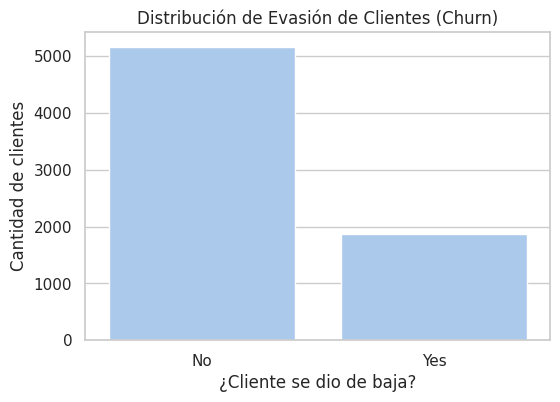

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética
sns.set(style="whitegrid", palette="pastel")

# Conteo de churn
churn_counts = df_clean['Churn'].value_counts()

# Gráfico de barras
plt.figure(figsize=(6,4))
sns.countplot(data=df_clean, x='Churn')
plt.title('Distribución de Evasión de Clientes (Churn)')
plt.xlabel('¿Cliente se dio de baja?')
plt.ylabel('Cantidad de clientes')
plt.show()


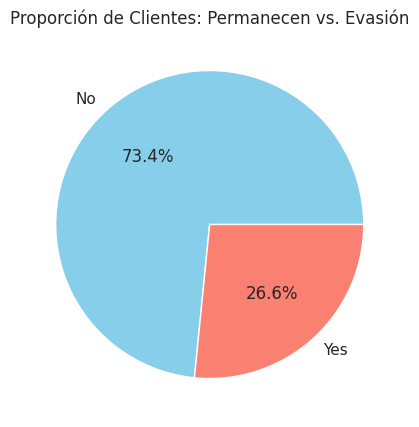

In [ ]:
# Gráfico circular
plt.figure(figsize=(5,5))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=["skyblue", "salmon"])
plt.title('Proporción de Clientes: Permanecen vs. Evasión')
plt.show()


##📌 ¿Qué vamos a hacer?
Visualizar la distribución de Churn frente a variables como:

*customer.gender

*account.Contract

*account.PaymentMethod

*internet.InternetService

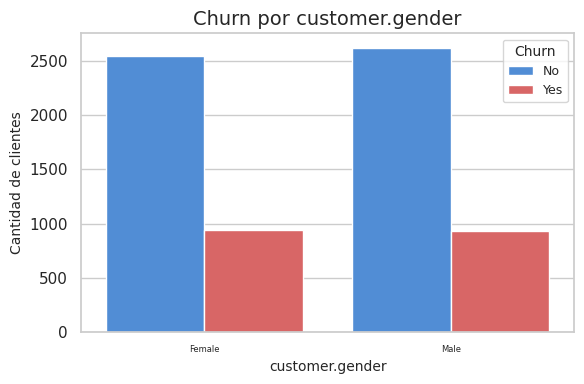

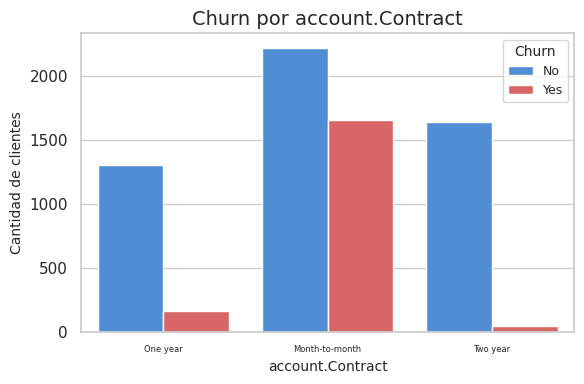

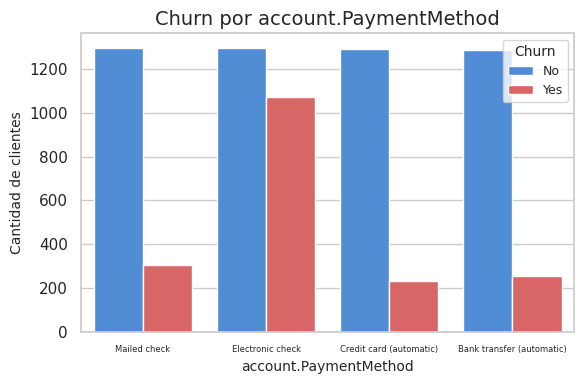

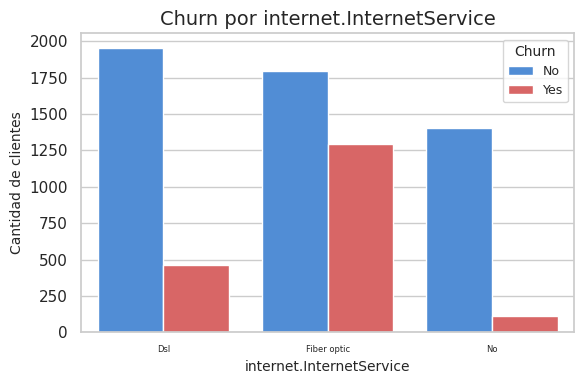

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables categóricas para analizar
categoricas = [
    'customer.gender',
    'account.Contract',
    'account.PaymentMethod',
    'internet.InternetService'
]

# Estilo
sns.set(style="whitegrid")
colores = ['#3B8BEB', '#EB5353']  # Azul y rojo suave

for col in categoricas:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_clean, x=col, hue='Churn', palette=colores)

    plt.title(f'Churn por {col}', fontsize=14)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Cantidad de clientes', fontsize=10)

    plt.xticks( fontsize=6)  # Letra más chica en eje X
    plt.legend(title='Churn', title_fontsize=10, fontsize=9)

    plt.tight_layout()
    plt.show()


### analisis de cómo varía la evasión (Churn) según variables numéricas, como:

*customer.tenure → tiempo que el cliente ha estado con la empresa

*account.Charges.Monthly → facturación mensual

*account.Charges.Total → facturación total

*Cuentas_Diarias → lo que paga el cliente por día (que creamos antes)

*customer.SeniorCitizen → si el cliente es mayor (1) o no (0)

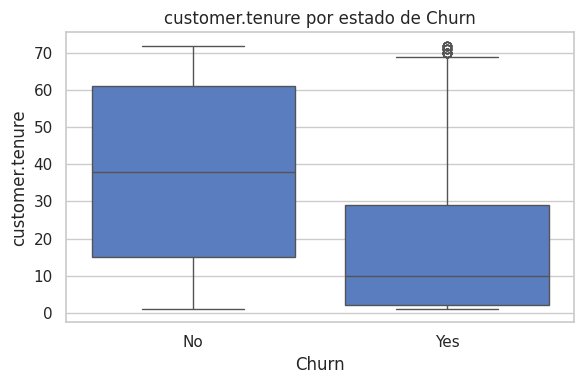

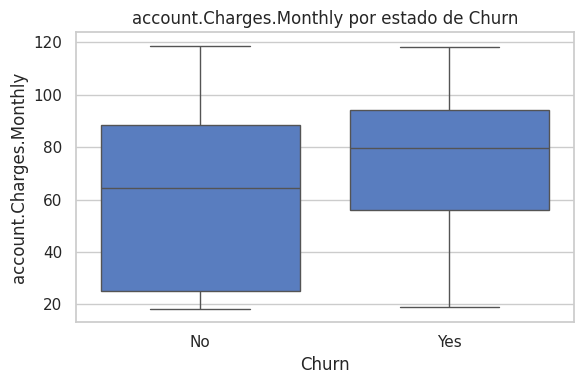

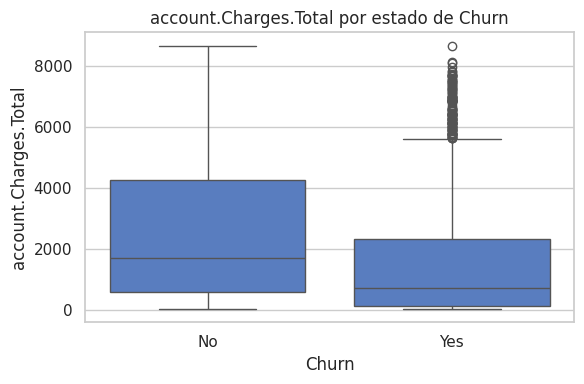

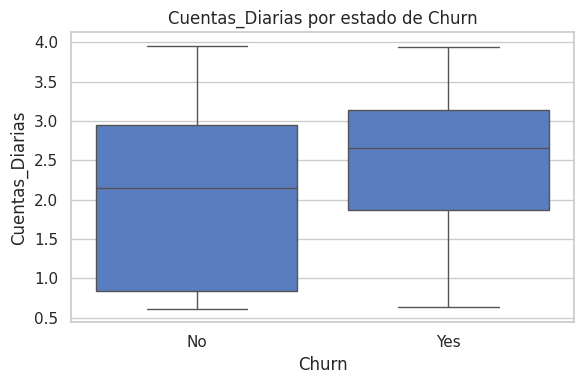

In [ ]:
variables_numericas = [
    'customer.tenure',
    'account.Charges.Monthly',
    'account.Charges.Total',
    'Cuentas_Diarias'
]

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="muted")

for col in variables_numericas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_clean, x='Churn', y=col)
    plt.title(f'{col} por estado de Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


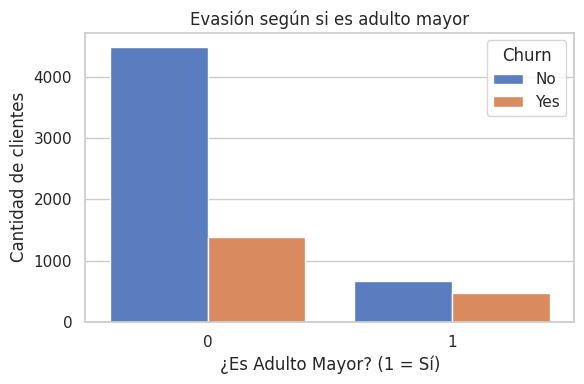

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_clean, x='customer.SeniorCitizen', hue='Churn')
plt.title('Evasión según si es adulto mayor')
plt.xlabel('¿Es Adulto Mayor? (1 = Sí)')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


###visualización de la distribución por estado de Churn###


 Se explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

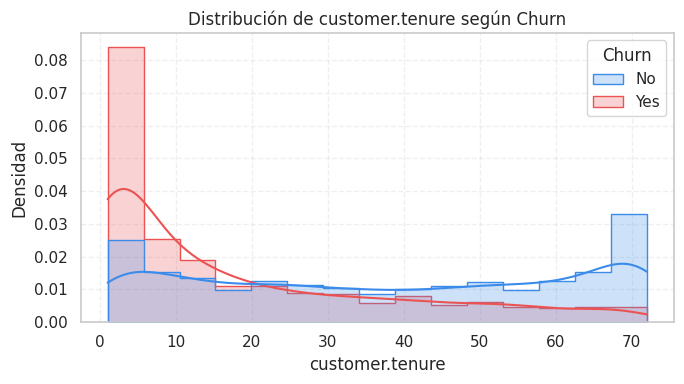

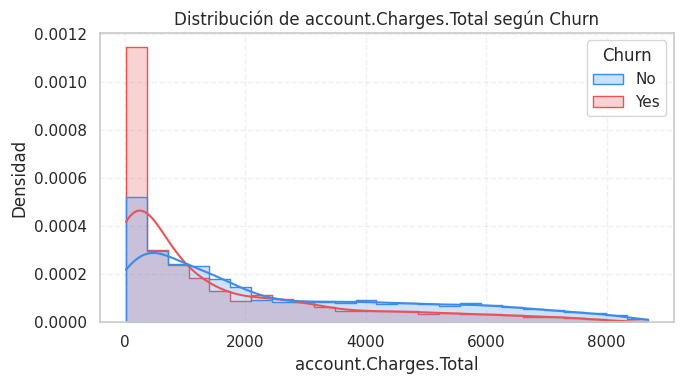

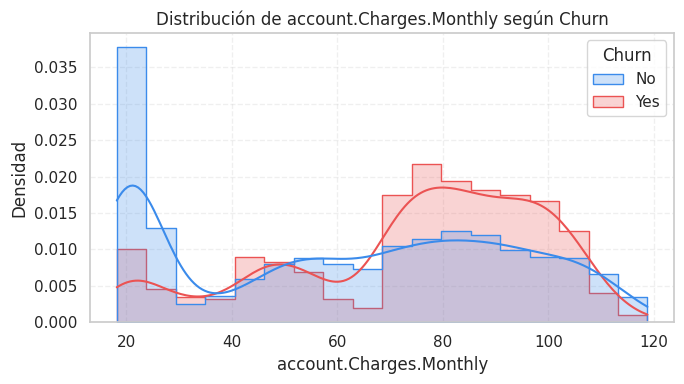

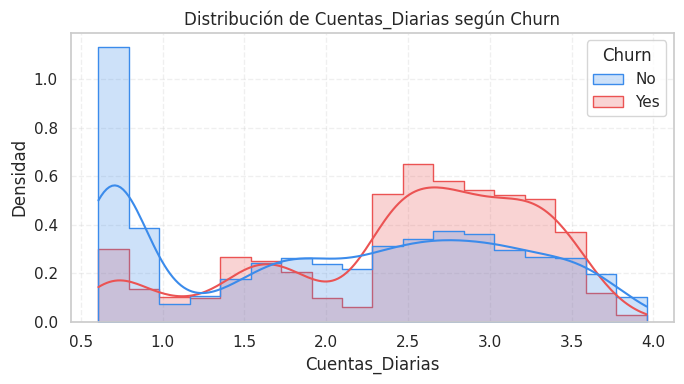

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variables numéricas a analizar
variables_numericas = [
    'customer.tenure',
    'account.Charges.Total',
    'account.Charges.Monthly',
    'Cuentas_Diarias'
]

# Paleta de colores para Churn
colores = {'Yes': '#EB5353', 'No': '#3B8BEB'}  # rojo para "Sí", azul para "No"

for var in variables_numericas:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df_clean, x=var, hue='Churn', kde=True, palette=colores, element="step", stat="density", common_norm=False)
    plt.title(f'Distribución de {var} según Churn')
    plt.xlabel(var)
    plt.ylabel('Densidad')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()


###📊 Informe Final - Análisis de Evasión de Clientes en Telecom X###

###1. Introducción###

Telecom X enfrenta una elevada tasa de evasión de clientes (Churn), lo que impacta negativamente en sus ingresos y estabilidad.
Este análisis tiene como objetivo identificar factores y patrones relacionados con la cancelación del servicio por parte de los clientes, a fin de ayudar al equipo de Data Science a desarrollar estrategias de retención efectivas.

###2. Limpieza y Tratamiento de Datos###

*Se importaron los datos desde un archivo JSON.

*Se utilizó pandas.json_normalize para aplanar la estructura y convertirla en un DataFrame.

*Se realizaron los siguientes tratamientos:

-Eliminación de duplicados.

-Corrección de valores nulos en columnas clave.

-Conversión de columnas numéricas mal tipadas (como TotalCharges).

-Uniformización de variables categóricas (Yes, No, etc.).

-Creación de una nueva variable: Cuentas_Diarias, que representa el gasto diario promedio del cliente.

###3. Análisis Exploratorio de Datos###

✅ Distribución general de Churn
Se observó que aproximadamente el 26% de los clientes se dio de baja, mientras que el 74% permaneció.

✅ Análisis por variables categóricas
Los clientes con contrato mensual mostraron una tasa de churn considerablemente mayor.

El método de pago con electronic check también está fuertemente asociado con la evasión.

No se observaron diferencias significativas por género.

✅ Análisis por variables numéricas
Los clientes que cancelaron tienden a tener menor permanencia (tenure).

Los que gastan más por día (Cuentas_Diarias) tienen mayor tendencia a irse.

La facturación mensual es ligeramente más alta en los clientes que se van.

###4. Conclusiones e Insights###

La duración del contrato y el método de pago son fuertes predictores de churn.

Los clientes recientes y los que gastan más por día tienen mayor riesgo de cancelación.

El segmento de adultos mayores no mostró un patrón claro, pero vale la pena investigarlo con más datos.

###5. Recomendaciones###

📦 Incentivar contratos de largo plazo (anuales o bianuales) mediante promociones.

💳 Revisar la experiencia de usuarios que pagan con electronic check, ya que muestran más churn.

🧮 Aplicar campañas de retención temprana a clientes con baja permanencia (menos de 6 meses).




